In [ ]:
import pandas as pd 
import numpy as np


In [ ]:
df =  pd.read_csv("News.csv")

In [5]:
df.drop(columns=["Unnamed: 0"] , inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44919 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [18]:
df[df["date"].isnull()]

,title,text,subject,date,class
9731,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN,0
12407,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN,0
13362,A MUST READ! Here’s Why Voting For DONALD TRUM...,This is a must read for anyone who s undecided...,NaN,NaN,0
17852,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,NaN,NaN,0
19625,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,NaN,NaN,0
21925,YEAR IN REVIEW: 2017 Top Ten Conspiracies,Patrick Henningsen and Shawn Helton 21st Centu...,NaN,NaN,0
21935,CLOAKED IN CONSPIRACY: Overview of JFK Files R...,Shawn Helton 21st Century WireSince late Octob...,NaN,NaN,0
21985,The Las Vegas Mass Shooting – More to the Stor...,Shawn Helton 21st Century WireAlthough many ar...,NaN,NaN,0
22021,What is The Deep State?,One of the ancillary benefits of Donald Trump ...,NaN,NaN,0
22312,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,NaN,NaN,0


In [23]:
df_new = df.dropna()

In [25]:
df_new.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [42]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [43]:
def preprocess_text(text_data):
    preprocessed_text = []
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [45]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review

  0%|          | 0/44919 [00:00<?, ?it/s]

100%|██████████| 44919/44919 [50:18<00:00, 14.88it/s]  


(np.float64(-0.5), np.float64(1599.5), np.float64(799.5), np.float64(-0.5))

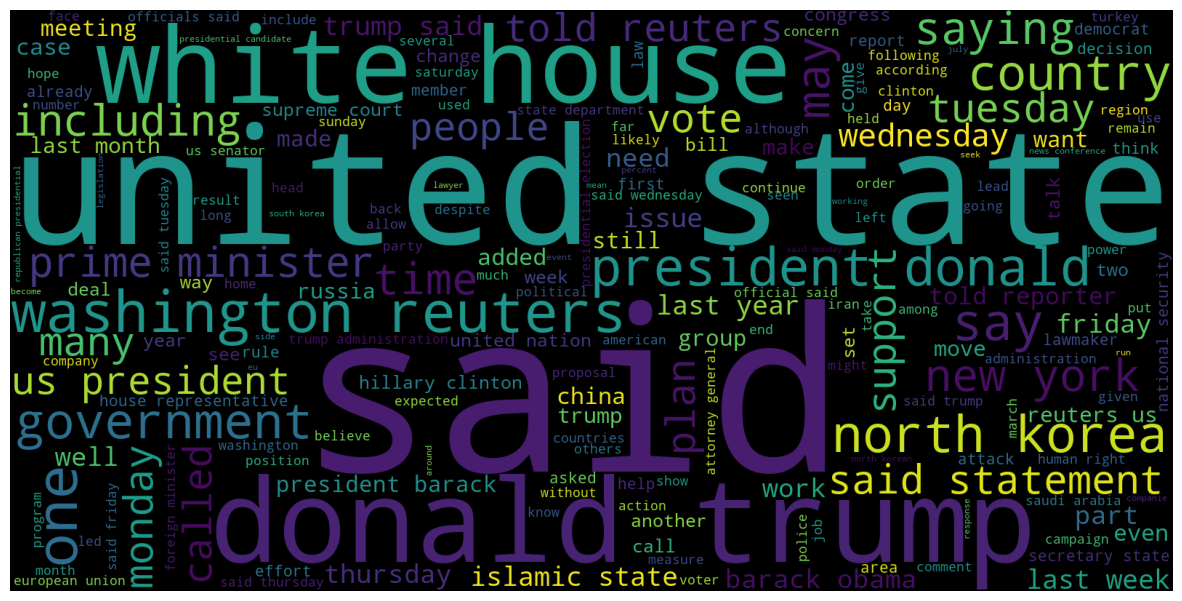

In [46]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt 

plt.figure(figsize=(15, 10)) 

title_text = " ".join(word for sentence in df["text"][df["class"] == 1] for word in sentence.split())

word_cloud = WordCloud(width=1600 ,height=800)

img = word_cloud.generate(text=title_text)

plt.imshow(img)
plt.axis(False)



In [47]:
df.to_csv("Processed_data.csv")

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['class'], 
                                                    test_size=0.25)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9938258778829885
0.9892252894033838


In [51]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

1.0
0.9961709706144256


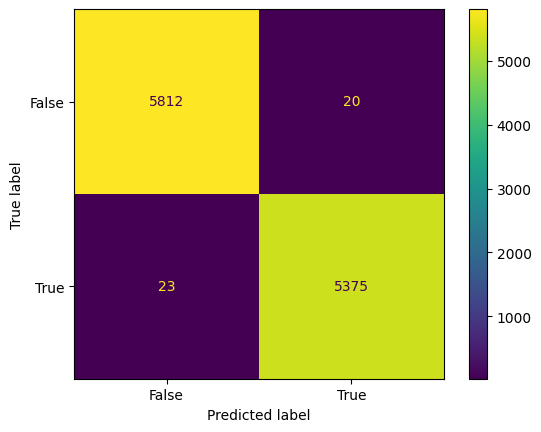

In [52]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()